# Анализ закономерностей влияющих на успешность компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

**Цель исследования**

Провести исследовательский анализ данных:
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Составить портрет пользователя каждого региона.
Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


Проверить гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Описание данных**

`/datasets/games.csv`

- ['Name'] — название игры
- ['Platform'] — платформа
- ['Year_of_Release'] — год выпуска
- ['Genre'] — жанр игры
- ['NA_sales'] — продажи в Северной Америке (миллионы проданных копий)
- ['EU_sales'] — продажи в Европе (миллионы проданных копий)
- ['JP_sales'] — продажи в Японии (миллионы проданных копий)
- ['Other_sales'] — продажи в других странах (миллионы проданных копий)
- ['Critic_Score'] — оценка критиков (максимум 100)
- ['User_Score'] — оценка пользователей (максимум 10)
- ['Rating'] — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Шаг 1. Обзор данных

Прочитаю датасет и ознакомлюсь с данными.

In [2]:
try:
    data = pd.read_csv('datasets/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
# получаю общую сводку
data.info()

# проверю на корректный вывод
display(data.sample(5))

# проверяю имена колонок на пробелы
display(data.columns)

# сводка по численным данным
data.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4424,G-Force,Wii,2009.0,Action,0.19,0.20,0.00,0.05,69.0,8,E10+
241,Madden NFL 07,PS2,2006.0,Sports,3.63,0.24,0.01,0.61,84.0,8.2,E
11521,Pilot ni Narou! 2,PS2,2001.0,Simulation,0.00,0.00,0.08,0.00,NaN,NaN,NaN
4169,Crash: Mind Over Mutant,X360,2008.0,Platform,0.22,0.20,0.00,0.05,60.0,6.5,E10+
7001,Cross Edge,PS3,2008.0,Role-Playing,0.14,0.02,0.05,0.02,52.0,7.2,T


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Всего в датасете 16 715 строк. 

Количество и наименования столбцов соответствуют документации.

Интересен разброс значений в столбцах с данными о продажах. Первый квартиль по всем регионам это отсутствие продаж. Для Японии медиана так же нулевая. Судя по третьему квартилю и максимальным значениям - данные округлены до двух знаков после запятой. Нулевые значения могут быть обусловлены сочетаним отстутсвия данных о продажах с другими факторами, такими как региональные ограничения на издание соответствующих игр, или слишком малым количеством продаж.

Подсчитаю количество явных дубликатов.

In [4]:
f'Количество явных дубликатов: {data.duplicated().sum()}'

'Количество явных дубликатов: 0'

Подсчитаю точное количество пропущенных значений и их долю от общего количества строк.

In [5]:
'Всего пропусков:', data.isna().sum()

('Всего пропусков:',
 Name                  2
 Platform              0
 Year_of_Release     269
 Genre                 2
 NA_sales              0
 EU_sales              0
 JP_sales              0
 Other_sales           0
 Critic_Score       8578
 User_Score         6701
 Rating             6766
 dtype: int64)

In [6]:
'Доля пропусков от общего количества строк:', data.isna().mean() #data.isna().sum().div(16715).mul(100)

('Доля пропусков от общего количества строк:',
 Name               0.000120
 Platform           0.000000
 Year_of_Release    0.016093
 Genre              0.000120
 NA_sales           0.000000
 EU_sales           0.000000
 JP_sales           0.000000
 Other_sales        0.000000
 Critic_Score       0.513192
 User_Score         0.400897
 Rating             0.404786
 dtype: float64)

Проверю уникальные значения столбцов ['Platform'], ['Genre'] и ['Rating'] как колонки с категориальными данными в которых могут содержаться неявные дубликаты.

In [7]:
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [8]:
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [9]:
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

Рейтинг "RP" (rating pending) используется только до выхода игры в продажу. Этого значения не должно быть в таблице, либо это игры с запланированным на 2016 год релизом - в таком случае значения продаж должны быть пустыми.
Рейтинг "K-A" (kids to adults) это устаревшее обозначение рейнтинга "E" (everyone).

Проверю строки с вышеприведенными значениями столбца ['Rating'].

In [10]:
data.query('Rating == "RP" or Rating == "K-A"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9,K-A
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
13672,Clockwork Empires,PC,NaN,Strategy,0.00,0.04,0.00,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.00,0.03,0.00,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.0,NaN,RP
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


Проверю столбец ['Name'] на наличие повторений, так как одна игра может быть издана на нескольких платформах.

In [11]:
data['Name'].duplicated().sum()

5155

### 1.1. Предварительные замечания:

- Названия колонок следует привести к нижнему регистру, для удобства работы;
- Пропуски в колонках ['Name'], ['Year_of_Release'], ['Genre'], ['Critic_Score'], ['User_Score'], ['Rating'];
- Для колонок ['User_Score'] и ['Rating'] количество пропусков превышает 40% от общего количества строк, для колонки ['Critic_Score'] количество пропусков превышает 50% от общего количества строк;
- Три игры ошибочно имеют рейтинг "RP";
- Тип данных ['User_Score'] - object. Можно исопльзовать float16.
- Тип данных ['Year_of_Release'] - float64. Так как дан только год в диапазоне с 1980 по 2016 - можно использовать тип данных int16.

## Шаг 2. Предобработка данных

Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- - Опишите причины, которые могли привести к пропускам;
- - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### 2.1. Работа с недочетами, ошибками и пропусками:

#### Замена названий столбцов

Приведу названия столбцов к нижнему регистру.

In [12]:
# применю .str.lower() прямо на названия колонок
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Работа с пропусками и недочетами.

Так как колонки ['name'], ['year_of_release'] и ['genre'] содержат незначительное количество пропусков, и нет возможности для их запонения на основе имеющихся данных, считаю верным отбросить строки с пропущенными значениями в данных столбцах.

In [13]:
# передам названия колонок методу dropna и роверю результат
data.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Также избавлюсь от оставшейся строки с рейтингом "RP".

In [14]:
data = data.query('rating != "RP"')

Перед тем как обрабатывать пропуски в столбцах ['critic_score'], ['user_score'] и ['rating'], следует обработать значения "tbd" в столбце ['user_score'].

In [15]:
f"Всего строк со значением 'tbd': {data[data['user_score'] == 'tbd']['user_score'].count()}"

"Всего строк со значением 'tbd': 2376"

In [16]:
# f"Доля строк со значением 'tbd' от общего количества: {2376 / 16444 * 100}"

print('Доля строк со значением "tbd" от общего количества:') 
(data[data['user_score'] == 'tbd']['user_score'].count()) / data.shape[0]

Доля строк со значением "tbd" от общего количества:


0.1444991789819376

Строки со значением "tbd" составляют 14.45% от общего количества строк.

Вероятно, "tbd" означает "to be determined" - то есть недостаток данных для заполнения численным значением. Проверю распределение этого значения по годам.

In [17]:
data.query('user_score == "tbd"').groupby('year_of_release')['name'].count()

year_of_release
1997.0      1
1999.0      8
2000.0     43
2001.0     82
2002.0    192
2003.0     95
2004.0    107
2005.0    121
2006.0    124
2007.0    192
2008.0    326
2009.0    405
2010.0    331
2011.0    217
2012.0     24
2013.0     15
2014.0     21
2015.0     38
2016.0     34
Name: name, dtype: int64

Наибольшее количество значений "tbd" сосредоточено в годах с 2002 по 2011 - трехзначные значения, (кроме 2013). Вероятнее всего, данные в колонки с оценкой пользователей не обновлялись после занесения, в связи с чем значение "tbd" не было заменено числовым.

В данной ситуации считаю приемлемым заменить "tbd" на NaN значения.

In [18]:
# использую метод replace, 'tbd' на вход, np.nan на выход
data['user_score'].replace('tbd', np.nan, inplace=True)
f"Всего строк со значением 'tbd': {data[data['user_score'] == 'tbd']['user_score'].count()}"

"Всего строк со значением 'tbd': 0"

Так как были обнаружены повторы в названиях игр, то можно попытаться запонить часть пропусков за счет оценки повторяемых игр на иных платформах. Остальные пропущенные значения в оценках можно заполнить средним показателем по каждому жанру, но я считаю такой подход неверным. Каждая игра это самостоятельный продукт, оцениваемый независимо от других игр, даже в пределах жанра. При количестве пропусков 40%-50% заполнение средним по жанрам лишь увеличит риск искажения данных.

```Также, пропуски в столбце ['rating'] следует оставить без изменений, так как их заполнение возможно лишь на основе данных из сторонних источников, что займет слишком много времени.```

Также пропуски в столбце ['rating'] следует заменить на значение "unknown", так как их заполнение возможно лишь на основе данных из сторонних источников, что займет слишком много времени, но в то же время их доля слишком существена и необходима для дальнейшего анализа.

In [19]:
data['rating'].fillna('unknown', inplace=True)

In [20]:
'Количество пропущенных значений:', data[['user_score', 'critic_score']].isna().sum()

('Количество пропущенных значений:',
 user_score      8981
 critic_score    8461
 dtype: int64)

In [21]:
# так как это необходимо для работы с пропусками, заранее изменю тип данных ['user_score'] (и ['critic_score'] просто для уверенности)
data['user_score'] = data['user_score'].astype('float16')
data['critic_score'] = data['critic_score'].astype('float16')

In [22]:
# воспользуюсь методом похожий на тот что использовал во втором проекте - data = data.fillna(data.groupby('income_type').transform('median'))
# но модифицированным для работы с одной колонкой
data['user_score'] = data.groupby('name')['user_score'].apply(lambda x: x.fillna(x.mean()))
data['critic_score'] = data.groupby('name')['critic_score'].apply(lambda x: x.fillna(x.mean()))

In [23]:
'Осталось пропущенных значений:', data[['user_score', 'critic_score']].isna().sum()

('Осталось пропущенных значений:',
 user_score      7920
 critic_score    7522
 dtype: int64)

#### Изменение типов данных

Так как тип данных столбца ['user_score'] пришлось изменить заранее, осталось лишь изменить тип данных столбца ['year_of_release'].

In [24]:
data['year_of_release'] = data['year_of_release'].astype('int16')
data['year_of_release'].sample(5)

1356     2011
1186     2008
4482     2014
15614    2010
14440    1998
Name: year_of_release, dtype: int16

### 2.2. Группировка, расчеты и добавление результатов:

Добавлю колонку ['total_sales'] содержащую сумму продаж по всем регионам.

In [25]:
# воспользуюсь сочетанием методов filter() и sum() чтобы сложить значения колонок содержащих 'sales' в названии
data['total_sales'] = data.filter(like='sales').sum(axis=1)

# проверю результат
data.filter(like='sales').sample(5)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
7357,0.05,0.11,0.04,0.01,0.21
9174,0.00,0.00,0.14,0.00,0.14
15699,0.00,0.00,0.02,0.00,0.02
5063,0.22,0.12,0.00,0.03,0.37
9354,0.12,0.00,0.00,0.01,0.13


Подготовка данных завершена.

### Шаг 2. Вывод:

По итогам предобработки:
- Названия столбцов приведены к единому виду;
- Удалены строки в столбцах с незначительным количеством пропусков (['name'], ['year_of_release'] и ['genre']);
- Удалены строки с неактуальными данными в столбце ['rating'];
- Занчения "tbd" колонки ['user_score'] неинформативны и заменены пропусками;
- Пропущенные значения колонки ['rating'] заполнены зачением 'unknown';
- Пропуски в оценках пользователей и критиков (['user_score'] и ['critic_score'] заполнены на счет совпадений ['name'], оставшиеся оставлены без изменений;
- Произведена замена типа данных: столбца ['year_of_release'] на int16, столбцов ['user_score'] и ['critic_score'] на float16;
- Добавлен столбец ['total_sales'] - сумма столбцов ['na_sales'], ['eu_sales'], ['jp_sales'], ['other_sales'].

Иных замечаний не выявлено.

## Шаг 3. Исследовательский анализ данных

Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


Составьте портрет пользователя каждого региона. Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### 3.1. Определение актуального периода:

Для определения актуального периода необходимо выявить текущие актуальные платформы, то есть платформы на которые продолжается выпуск компьютерных игр.  
Актуальным периодом будет период начиная с года выпуска самой ранней из текущих актуальных платформ. При этом необходимо использовать платформы с наибольшим количеством продаж. Такм образом получим список актуальных платформ.

При этом счяитаю верным отдельно определить список "классических" игр, то есть игр выпущенных до первого года актуального периода, по которым значение продаж разделенное на возраст игры позволяет судить о ее необычной популярности.

Посчитаем количество выпущенных игр по годам.

In [26]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1135
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Явно заметен рост количества релизов, с девяностых по 2008-2010 годы, после чего наступает спад. Рост в целом явно вызван формированием и развитием игровой индустрии, выпуском новых платформ и ростом количества компаний-разработчиков компьютерных игр. Возможно причиной спада стало устаревание части платформ, в том числе мобильных игровых консолей? Нужен более глубокий анализ.

In [27]:
# для определения актуального периода разанее отброшу все года до 2000, здравый смысл подсказывает что из вышедших до 2000 года популярными могли остаться лишь игры ставшие классикой
data_past_2000 = data.query('year_of_release >= 2000')

In [28]:
# для определения актуальных платформ сохраню список из 15 платформ с наибольшим количеством релизов
top_15_platforms = data_past_2000.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(15)
top_15_platforms = top_15_platforms.reset_index()
top_15_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS4,314.14
6,GBA,312.88
7,PSP,289.53
8,3DS,257.81
9,XB,251.57


In [29]:
# составлю сводные тиблицы с количеством релизов платформ по годам и продажами игр по годам их релиза
platform_releases_by_year = data_past_2000.pivot_table(index='platform',  columns='year_of_release', values='total_sales', aggfunc='count')
# исключу лишние платформы
platform_releases_by_year = platform_releases_by_year.query('platform in @top_15_platforms["platform"]')
display(platform_releases_by_year.sample(5))

# повторю те же действия но с суммой продаж вместо подсчета количества значений
platform_sales_by_year = data_past_2000.pivot_table(index='platform',  columns='year_of_release', values='total_sales', aggfunc='sum')
platform_sales_by_year = platform_sales_by_year.query('platform in @top_15_platforms["platform"]')
platform_sales_by_year.sample(5)

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,61.0,80.0,87.0
PS3,NaN,NaN,NaN,NaN,NaN,NaN,27.0,90.0,138.0,162.0,181.0,215.0,148.0,126.0,108.0,73.0,38.0
XB,1.0,33.0,158.0,189.0,177.0,179.0,62.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,42.0,31.0,28.0,14.0
GC,NaN,22.0,152.0,144.0,83.0,97.0,40.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
GC,NaN,26.34,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wii,NaN,NaN,NaN,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
PS3,NaN,NaN,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35,4.60


Получив сводные таблицы можно построить графики чтобы увидеть рост и падение продаж и релизов консолей по годам.

In [30]:
# задам стандартынй размер графика
sns.set(rc={'figure.figsize':(20,10)})

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

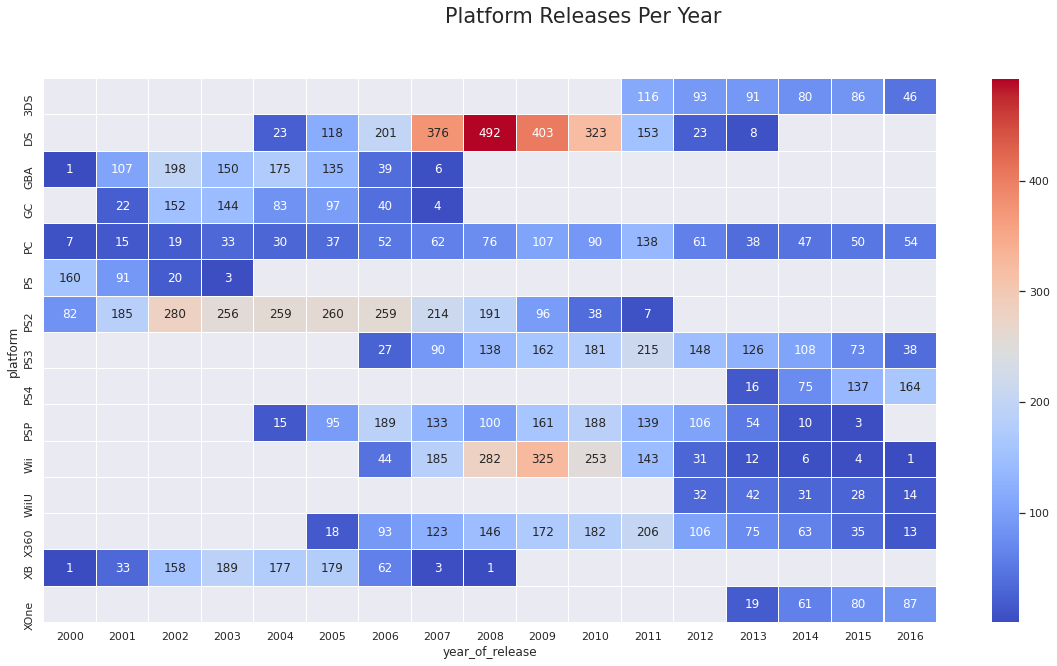

In [31]:
# дам название графику для наглядности
plt.suptitle('Platform Releases Per Year', size='xx-large')
# воспользуюсь sns.heatmap с аннотациями
sns.heatmap(
    data=platform_releases_by_year,
    cmap='coolwarm',
    linewidths=0.1,
    annot=True,
    fmt='g'
)

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

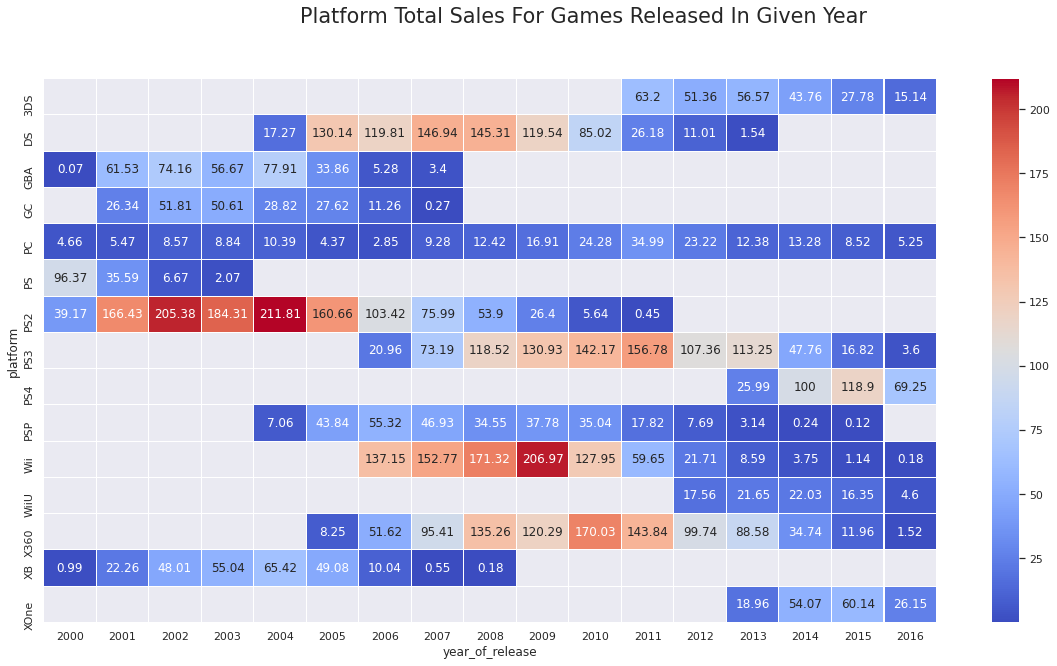

In [32]:
# дам название графику для наглядности
plt.suptitle('Platform Total Sales For Games Released In Given Year', size='xx-large')
# воспользуюсь sns.heatmap с аннотациями
sns.heatmap(
    data=platform_sales_by_year,
    cmap='coolwarm',
    linewidths=0.1,
    annot=True,
    fmt='g'
)

#### 3.1. Вывод:

Типичный срок актуальности платформы - от 9 до 12 лет. При этом к концу срока падает количество игровых релизов, соответственно можно предсказать падение спроса.
Отдельно стоит выделить платформу "PC" - персональный компьютер. Не смотря на меньшее количество релизов и меньшие продажи эта платформа не устаревает в силу конструктивных особенностей.  
Наиболее актуальными на 2016 год являются платформы "XOne", "PS4", "WiiU", "3DS".  
Остальные платформы либо уже сошли на незначительное количество релизов, либо полностью утратили актуальность не имея ни одного релиза в 2016 и более ранних годах.

```Актуальным периодом предлагаю считать период появления на графике платформы "3DS", то есть с 2011 года включительно. Этот год также примечателен нибольшим количеством релизов на консоли подходящие к концу тх текущей актуальности, что позволит включить достаточное количество игр для анализа поведения пользователей в современных условиях игровой индустрии.```

Актуальным периодом предлагаю считать период с 2013 года включительно, так как в 2013 году произошел релиз платформ лидеров "PS3 и XOne". С учетом неполного охвата платформами года релиза и неполных данных за 2016 год можно считать взятый период примерно равным трем годам, то есть риск влияния устаревших трендов на результаты анализа будет незначительным.

### 3.2. Дополнительно, определение списка классических игр:

Для определения списка классических игр возьму срез с играми вышедшими до определенного актуального периода, то есть до 2013 года.

In [33]:
data_classics = data.query('year_of_release < 2013')

In [34]:
# избавлюсь от предупреждений
import warnings
warnings.filterwarnings('ignore')

In [35]:
# вычту 2017 из колонки с годом релиза чтобы рассчитать текущий возраст игры
data_classics['lifespan'] = data['year_of_release'].sub(2017).abs()
data_classics['lifespan'].sample(5)

9963     19
14481     8
9878      6
10936    11
14935     5
Name: lifespan, dtype: int16

In [36]:
# разделю суммарные продажи игры на возраст игры чтобы получить средние продажи
data_classics['average_sales'] = data_classics['total_sales'].div(data_classics['lifespan'])

In [37]:
# отброшу лишние колонки, отсортирую оставшиеся по уббыванию средних продаж
data_classics = data_classics[['name', 'year_of_release', 'average_sales', 'lifespan']]
data_classics = data_classics.sort_values(by='average_sales', ascending=False)

Данные подготовлены. Выведу два списка "Топ 10", с играми возрастом до 15 и возрастом от 15 до 35 лет

In [38]:
data_classics.query('lifespan <= 15').head(10)

,name,year_of_release,average_sales,lifespan
0,Wii Sports,2006,7.503636,11
3,Wii Sports Resort,2009,4.096250,8
2,Mario Kart Wii,2008,3.946667,9
8,New Super Mario Bros. Wii,2009,3.540000,8
14,Kinect Adventures!,2010,3.117143,7
34,Call of Duty: Black Ops II,2012,2.758000,5
35,Call of Duty: Black Ops II,2012,2.736000,5
15,Wii Fit Plus,2009,2.725000,8
6,New Super Mario Bros.,2006,2.709091,11
7,Wii Play,2006,2.628182,11


In [39]:
data_classics.query('15 < lifespan <= 35').head(10)

,name,year_of_release,average_sales,lifespan
4,Pokemon Red/Pokemon Blue,1996,1.494286,21
12,Pokemon Gold/Pokemon Silver,1999,1.282778,18
1,Super Mario Bros.,1985,1.257500,32
5,Tetris,1989,1.080714,28
28,Gran Turismo 3: A-Spec,2001,0.935625,16
9,Duck Hunt,1984,0.857879,33
38,Grand Theft Auto III,2001,0.818750,16
30,Pokémon Yellow: Special Pikachu Edition,1998,0.770526,19
18,Super Mario World,1990,0.763704,27
21,Super Mario Land,1989,0.647857,28


#### 3.2. Вывод:

Помимо всем известного "Tetris", который, в том или ином виде, должен быть в каждом уважающем себя игровом магазине, в списке встречается значительное количество игр серий "Mario" и "Pokemon", включая знаменитую, "ту самую" "Super Mario Bros." 1985 года.  
Считаю что стоит рекомендовать обратить внимание на данные серии игр, и на разработчика "Nintendo" в частности, особенно в свете планируемого в 2017 году выхода гибридной консоли "Nintendo Switch".  

Также в список попали игры "Call of Duty: Black Ops II", "Grand Theft Auto III" и "Gran Turismo 3: A-Spec". Только по этому показателю можно рекомендовать обратить внимание на данные серии игр.

### 3.3. Анализ продаж по платформам в актуальном периоде, определение перспективных платформ:

Оставлю аткуальный период, выгружу данные которые более не понадобятся.

In [40]:
# отфильтровываю данные до 2013 года и проверяю
data_past_2013 = data_past_2000.query('year_of_release >= 2013')
data_past_2013['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

In [41]:
# избавлюсь от потерявших актуальность до анализируемого периода платформ "DS" "Wii" и "PSP"
data_past_2013 = data_past_2013.query('(platform != "DS") and (platform != "PSP") and (platform != "Wii")')
data_past_2013['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
Name: platform, dtype: int64

In [42]:
# выгружаю лишнее данные из памяти
del data, data_past_2000, data_classics, platform_releases_by_year, platform_sales_by_year, top_15_platforms

Составлю сводную таблицу продаж по платформам, уже на основе данных актуального периода и снова выведу по ней график.

In [43]:
platform_sales_by_year = data_past_2013.pivot_table(index='platform',  columns='year_of_release', values='total_sales', aggfunc='sum')

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

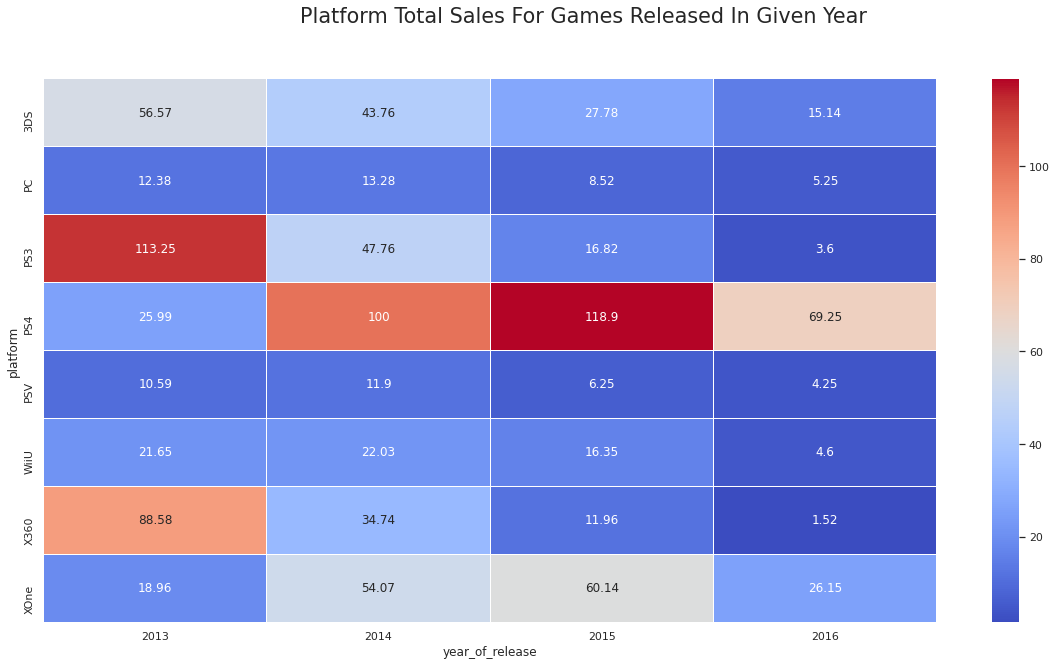

In [44]:
# дам название графику для наглядности
plt.suptitle('Platform Total Sales For Games Released In Given Year', size='xx-large')
# воспользуюсь sns.heatmap с аннотациями
sns.heatmap(
    data=platform_sales_by_year,
    cmap='coolwarm',
    linewidths=0.1,
    annot=True,
    fmt='g'
)

Постою диаграмму размаха чтобы наглядно увидеть диапазон продаж игр различных платформ в актуальном периоде.

In [45]:
# для построения диаграммы размаха сводная таблица не подойдет - создам ее аналог через метод groupby
platform_sales_by_year_grouped = data_past_2013.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
platform_sales_by_year_grouped.query('platform == "3DS" or platform == "PS3"')

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
8,PS3,2013,113.25
9,PS3,2014,47.76
10,PS3,2015,16.82
11,PS3,2016,3.60


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

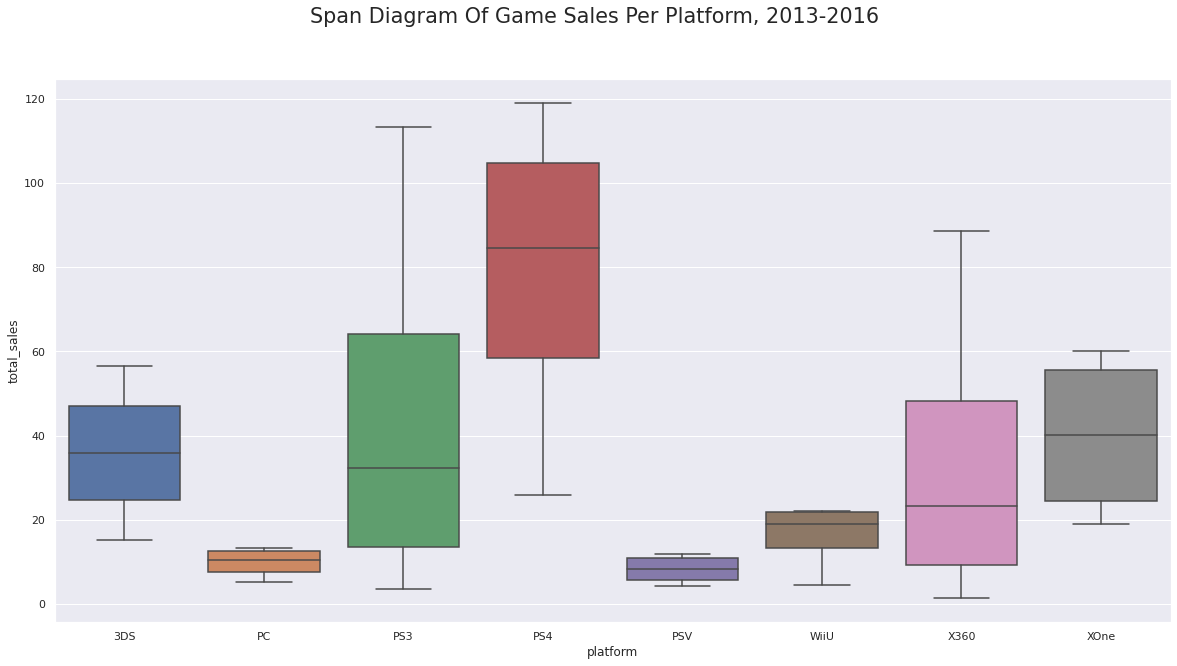

In [46]:
plt.suptitle('Span Diagram Of Game Sales Per Platform, 2013-2016', size='xx-large')
sns.boxplot(data=platform_sales_by_year_grouped, x='platform', y='total_sales')

Подсчитаю общий объем продаж по консолям в актуальном периоде.

На диаграмме размаха заметно изменение продаж представленных платформ в актуальном периоде, минимум, максимум, медианное значение. Видно что минимальные продажи платформы "PS4" почти на уровне максимальных продаж платформы "PS3" в актуальном периоде, в то время как минимальные продажи "XOne" лишь на уровне медианных продаж "X360" в актуальном периоде. В данной ситуации выбросы не ожидались, данный график лишь иной способ представить уже полученные данные, и имеет смысл только с учетом полученных данных, так как не показывает рост/падение продаж, а только размах.

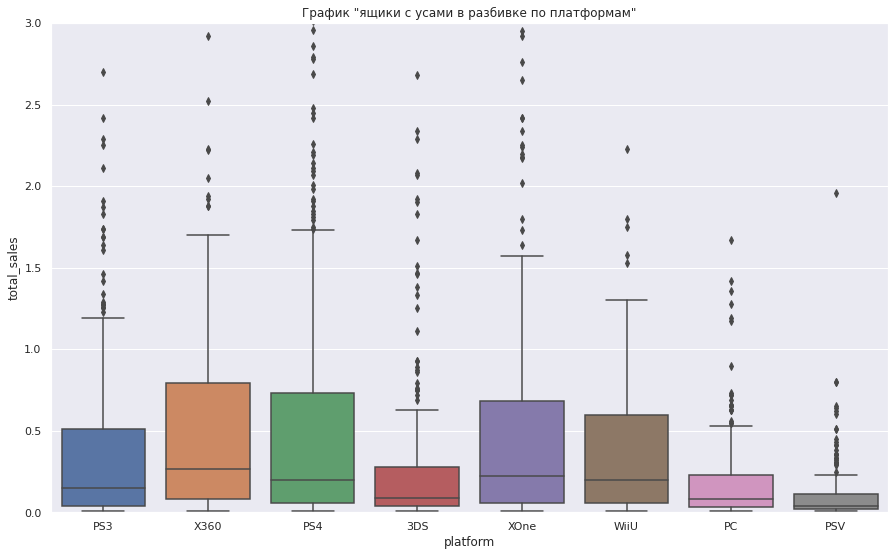

In [83]:
#Код ревьюера
import seaborn as sns

plt.figure(figsize= (15, 9))
sns.boxplot(x = data_past_2013['platform'], y = data_past_2013['total_sales'])
plt.title('График "ящики с усами в разбивке по платформам"')
plt.ylim(0, 3)
plt.show()

In [47]:
total_platform_sales = platform_sales_by_year.sum(axis=1).reset_index()
total_platform_sales.columns = ['platform', 'total_sales']
total_platform_sales.sort_values(by='total_sales', ascending=False)

,platform,total_sales
3,PS4,314.14
2,PS3,181.43
7,XOne,159.32
0,3DS,143.25
6,X360,136.80
5,WiiU,64.63
1,PC,39.43
4,PSV,32.99


#### 3.3. Вывод:

Следует учитывать, что данные за 2016 год являются неполными, и не могут использоваться для выводов о росте/падении продаж.  
Лидируют по объему прода платформы "PS3", "X360", "PS4", "3DS', "XOne". При этом следует выделить платформу "PC", занимающую седьмое место по продажам в актуальном периоде, но не обладающую такой характеристикой как "период актуальности платформы" и показывающую низкие, но стабильные продажи.
На диаграмме размаха заметно значительное изменение продаж по платформам "PS3" и "X360", что объясняется постепенным снижением количества проданных на них игр, как видно из тепловой карты.  
Из выделенных ранее актуальных платформ, наиболее перспективными явняются "PS4" и "XOne", как патформы являющиеся преемниками платформ "PS3" и "X360" и находящиеся в стадии роста продаж и роста количества релизов.

### 3.4. Анализ влияния оценок пользователей и критиков на продажи на примере платформ "PS3", "X360" и "3DS":

Я решил выбрать платформу "PS4" для анализа влияния оценок пользователей и критиков, как платформу с наибольшим количеством продаж в актуальном периоде.  
Я решил выбрать платформу "PS3" для сравнения результатов, как платформу предшественник "PS3".  
Я решил выбрать платформу "3DS" для сравнения результатов, так как "3DS" это эксклюзивно портативная платформа, в отличие от предыдущих платформ.

Для анализа использую срез данных актуального периода содержащие только строки с платформой "PS3", "PS4" и "3DS".

In [48]:
ps3_data = data_past_2013.query('platform == "PS3"')
display(ps3_data.sample(5))

ps4_data = data_past_2013.query('platform == "PS4"')
display(ps4_data.sample(5))

n3ds_data = data_past_2013.query('platform == "3DS"')
n3ds_data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6550,Puppeteer,PS3,2013,Platform,0.11,0.08,0.02,0.04,80.0000,8.500000,E10+,0.25
4365,Deadpool,PS3,2013,Action,0.23,0.14,0.00,0.08,61.0000,7.199219,M,0.45
2435,LEGO Jurassic World,PS3,2015,Action,0.35,0.36,0.00,0.14,70.7500,7.398438,E10+,0.85
13562,Puyo Puyo Tetris,PS3,2014,Puzzle,0.00,0.00,0.04,0.00,NaN,NaN,unknown,0.04
9465,Pro Evolution Soccer 2017,PS3,2016,Sports,0.01,0.05,0.06,0.01,80.3125,7.199219,E,0.13


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4033,Plants vs. Zombies: Garden Warfare 2,PS4,2016,Shooter,0.20,0.21,0.00,0.08,81.0,7.699219,E10+,0.49
15943,Professional Farmer 2016,PS4,2015,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16428,R.B.I. Baseball 2016,PS4,2016,Sports,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01
15148,Resident Evil: Umbrella Corps,PS4,2016,Action,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02
4768,Dragon Quest Builders: Revive Alefgard,PS4,2016,Role-Playing,0.04,0.11,0.22,0.03,NaN,NaN,unknown,0.40


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14127,My Hero Academia: Battle for All,3DS,2016,Action,0.00,0.00,0.04,0.00,NaN,NaN,unknown,0.04
15530,Downtown Nekketsu Jidaigek,3DS,2015,Action,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02
12631,Metal Max 4: Gekkou no Diva,3DS,2013,Role-Playing,0.00,0.00,0.06,0.00,NaN,NaN,unknown,0.06
6037,Sonic Boom: Shattered Crystal,3DS,2014,Action,0.17,0.09,0.00,0.03,47.0,6.300781,E,0.29
8878,Castlevania: Lords of Shadow - Mirror of Fate,3DS,2013,Action,0.04,0.07,0.03,0.01,NaN,NaN,unknown,0.15


Найду коэффициенты корреляции Пирсона для пар общих продаж и оценок пользователей/критиков. Затем построю диаграммы рассеяния для наглядного представления взаимосвязи.

#### 3.4. PS3:

In [49]:
display(f"Коэффициент корреляции между продажами и оценкой критиков для платформы PS3: {ps3_data['total_sales'].corr(ps3_data['critic_score'])}")
print()
f"Коэффициент корреляции между продажами и оценкой пользователей для платформы PS3: {ps3_data['total_sales'].corr(ps3_data['user_score'])}"

'Коэффициент корреляции между продажами и оценкой критиков для платформы PS3: 0.29330442406050006'

'Коэффициент корреляции между продажами и оценкой пользователей для платформы PS3: 0.0076404579003203'

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

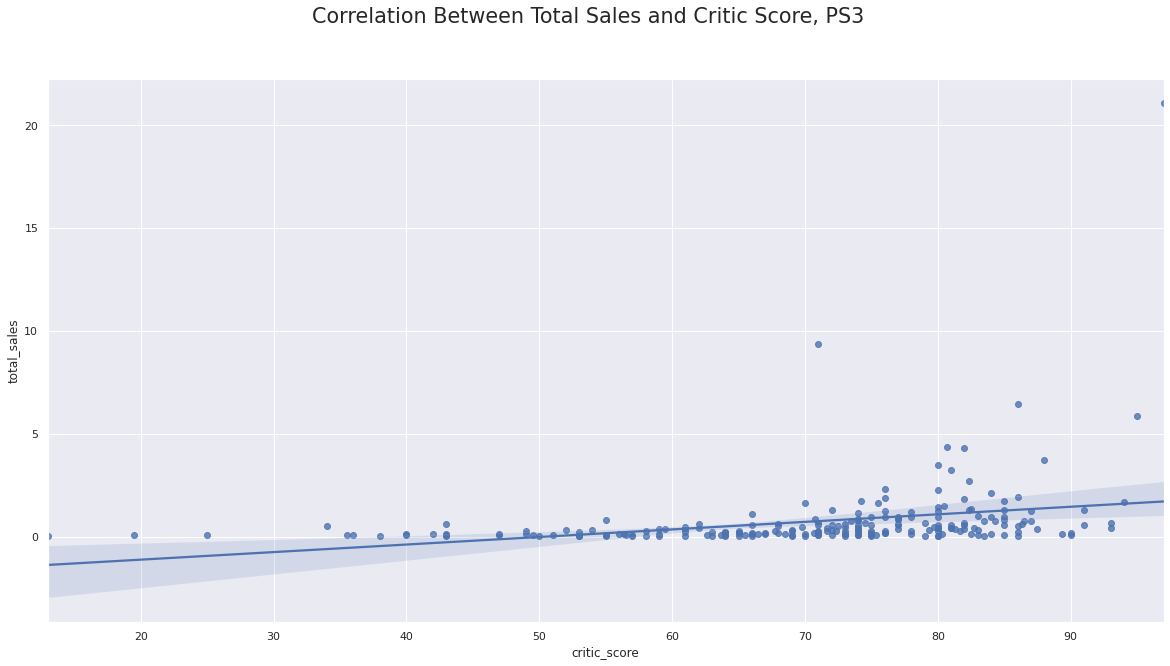

In [50]:
plt.suptitle('Correlation Between Total Sales and Critic Score, PS3', size='xx-large')
sns.regplot(data=ps3_data, x="critic_score", y="total_sales")

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

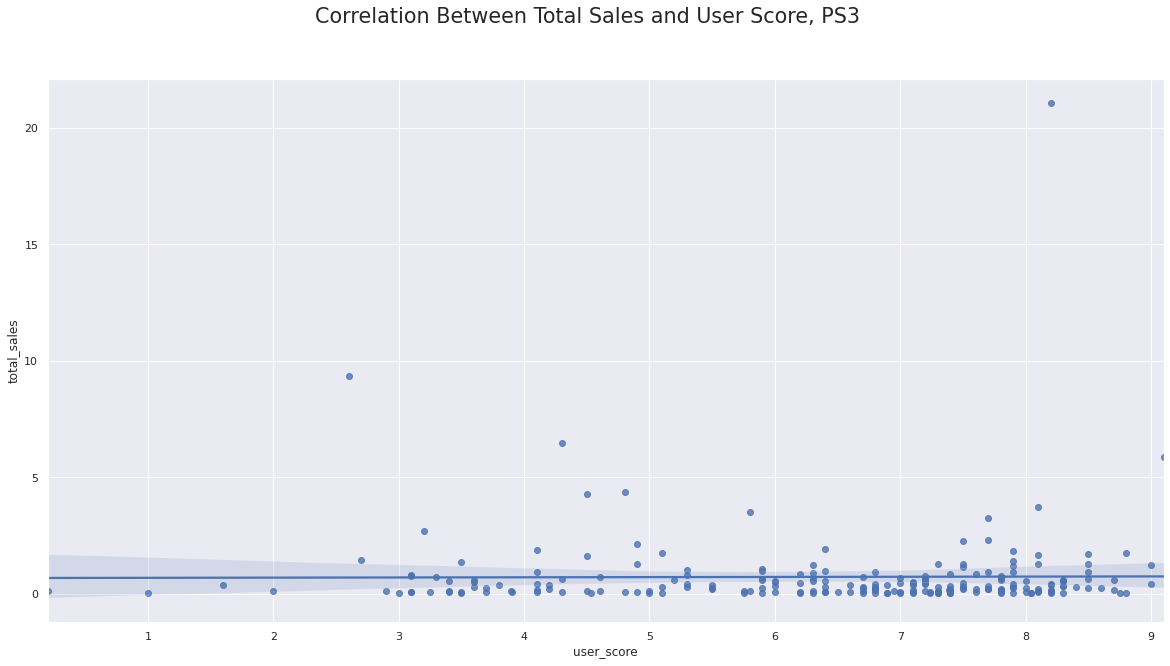

In [51]:
plt.suptitle('Correlation Between Total Sales and User Score, PS3', size='xx-large')
sns.regplot(data=ps3_data, x="user_score", y="total_sales")

#### 3.4. PS4:

In [52]:
display(f"Коэффициент корреляции между продажами и оценкой критиков для платформы PS4: {ps4_data['total_sales'].corr(ps4_data['critic_score'])}")
print()
f"Коэффициент корреляции между продажами и оценкой пользователей для платформы PS4: {ps4_data['total_sales'].corr(ps4_data['user_score'])}"

'Коэффициент корреляции между продажами и оценкой критиков для платформы PS4: 0.3912682698576927'

'Коэффициент корреляции между продажами и оценкой пользователей для платформы PS4: -0.0230051612762616'

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

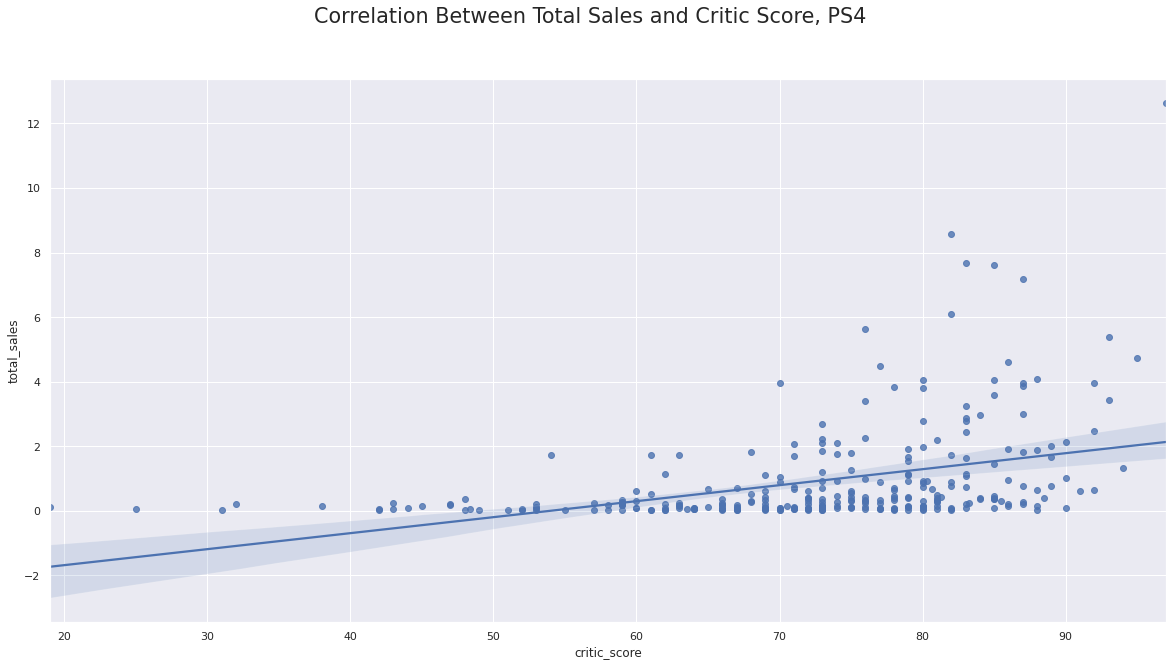

In [53]:
plt.suptitle('Correlation Between Total Sales and Critic Score, PS4', size='xx-large')
sns.regplot(data=ps4_data, x="critic_score", y="total_sales")

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

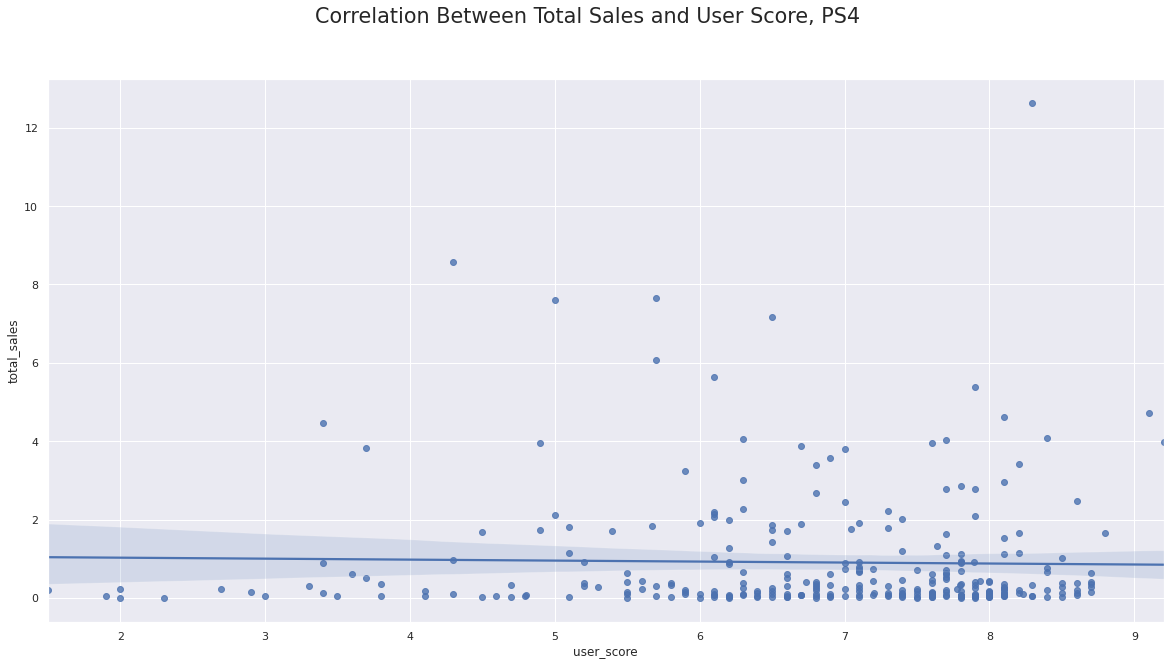

In [54]:
plt.suptitle('Correlation Between Total Sales and User Score, PS4', size='xx-large')
sns.regplot(data=ps4_data, x="user_score", y="total_sales")

#### 3.4. 3DS:

In [55]:
display(f"Коэффициент корреляции между продажами и оценкой критиков для платформы 3DS: {n3ds_data['total_sales'].corr(n3ds_data['critic_score'])}")
print()
f"Коэффициент корреляции между продажами и оценкой пользователей для платформы 3DS: {n3ds_data['total_sales'].corr(n3ds_data['user_score'])}"

'Коэффициент корреляции между продажами и оценкой критиков для платформы 3DS: 0.34323954486430364'

'Коэффициент корреляции между продажами и оценкой пользователей для платформы 3DS: 0.2872769712164718'

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

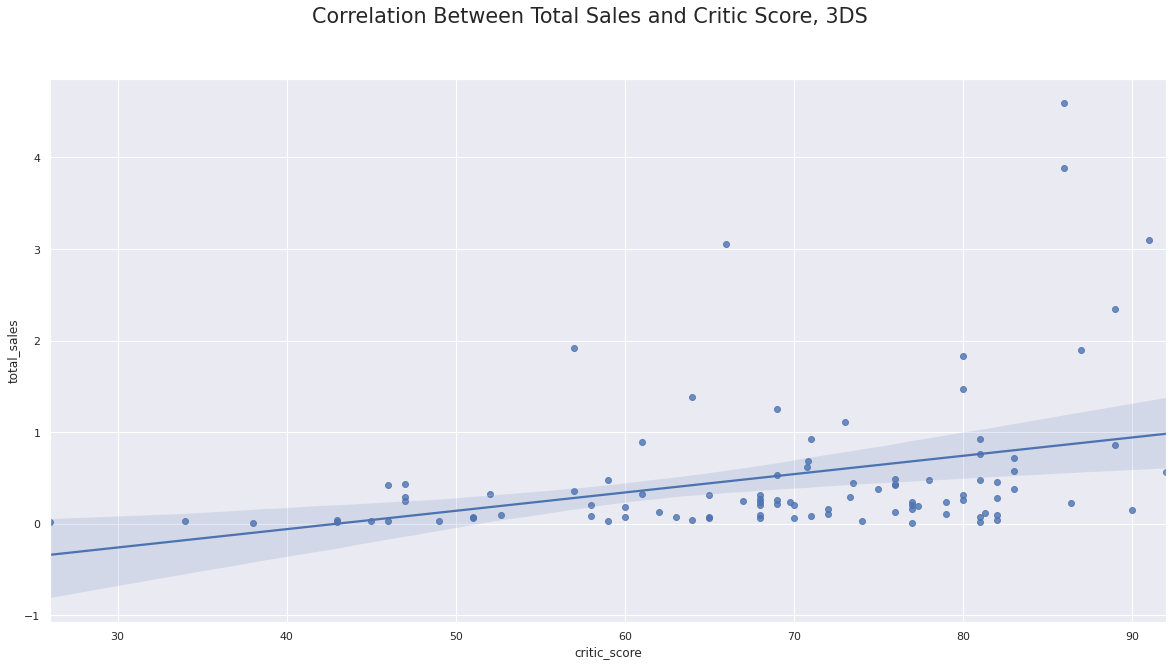

In [56]:
plt.suptitle('Correlation Between Total Sales and Critic Score, 3DS', size='xx-large')
sns.regplot(data=n3ds_data, x="critic_score", y="total_sales")

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

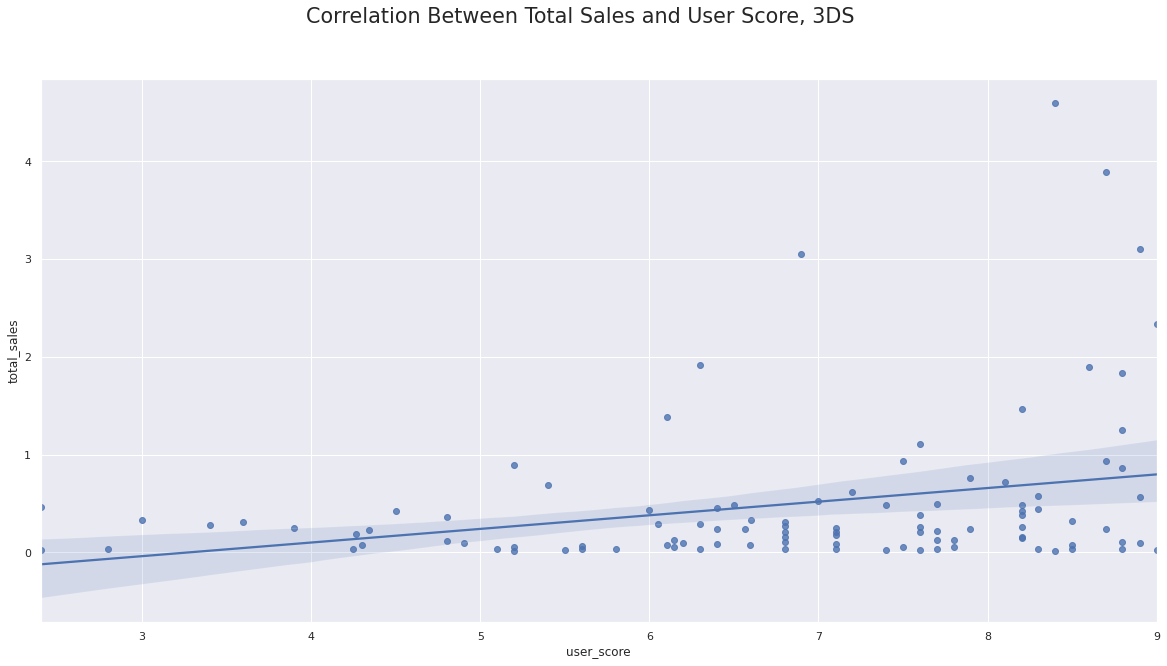

In [57]:
plt.suptitle('Correlation Between Total Sales and User Score, 3DS', size='xx-large')
sns.regplot(data=n3ds_data, x="user_score", y="total_sales")

#### 3.4. Вывод:

Для трех проанализированных платформ: "PS3", "PS4", "3DS".  
Присутствует незанчительная зависимость продаж от оценок критиков - коэффициент корреляции 0.29 - 0.39.  
Для стационарных платформ ""PS3" и "PS4" нет зависимости продаж от оценок пользователей - коэффициент корреляции -0.02 - 0.00.  
Для портативной платформы присутствует незначительнная зависимость продаж от оценок пользователей - 0.28.

При этом следует заметить, что на графиках регрессии заметны точки(игры) с большим количеством продаж и высокими оценками критиков - в то время как, судя по позиции точек(игр), некоторые из этих игр получили низкие оценки пользователей. Что и вызвало разницу коэффициентов корреляции.  
Особенность оценок пользователей в том, что пользователи оставляют оценки после факта покупки игры.  
Я не могу утверждать что оценка критиков ведет к большим продажам так как, судя по графикам регрессии, многие игры с аналогичной высокой оценкой критиков продались в гораздо меньших объемах.  

В связи с этим я прихожу к выводу что видимая незначительная зависимость продаж от оценок вызвана сторонними факторами - например, релизов игр из популярных серий, обспечивающих высокие продажи за счет наработанной фанатской базы и больших затрат на маркетинг.

### 3.5. Анаиз распределения игр по жанрам:

Для наглядного представления количества релизов по жанрам составлю гистограмму.

<AxesSubplot:xlabel='genre', ylabel='Count'>

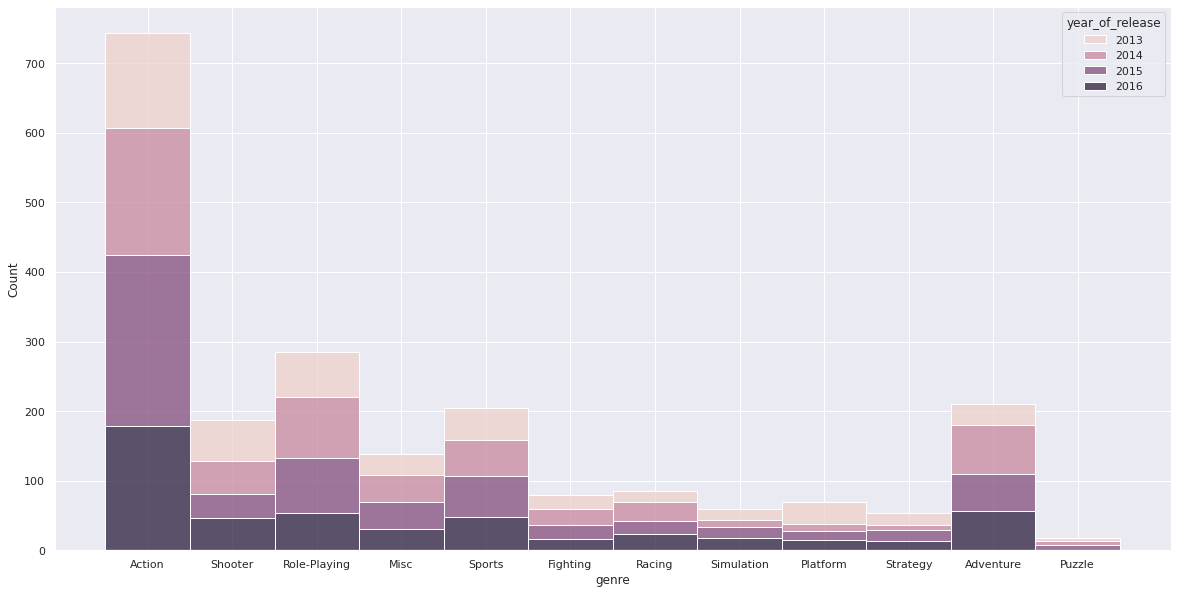

In [58]:
sns.histplot(
    data=data_past_2013,
    x='genre',
    hue='year_of_release',
    multiple='stack'
)

Для определения количества продаж по жанрам составлю сводную таблицу по тому же методу что использовался для наглядного представления продаж по платформам.

In [59]:
genre_sales_by_year = data_past_2013.pivot_table(index='genre',  columns='year_of_release', values='total_sales', aggfunc='sum')

<AxesSubplot:xlabel='year_of_release', ylabel='genre'>

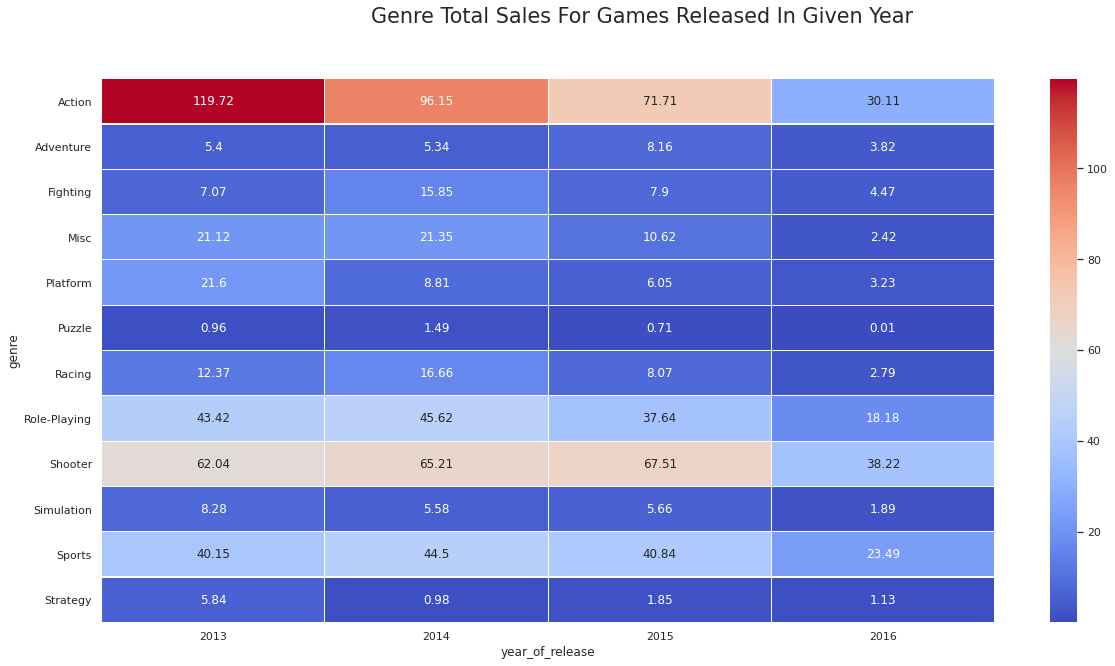

In [60]:
# дам название графику для наглядности
plt.suptitle('Genre Total Sales For Games Released In Given Year', size='xx-large')
# воспользуюсь sns.heatmap с аннотациями
sns.heatmap(
    data=genre_sales_by_year,
    cmap='coolwarm',
    linewidths=0.1,
    annot=True,
    fmt='g'
)

Подсчитаю общий объем продаж по жанрам в актуальном периоде.

In [61]:
total_genre_sales = genre_sales_by_year.sum(axis=1).reset_index()
total_genre_sales.columns = ['genre', 'total_sales']
total_genre_sales.sort_values(by='total_sales', ascending=False)

,genre,total_sales
0,Action,317.69
8,Shooter,232.98
10,Sports,148.98
7,Role-Playing,144.86
3,Misc,55.51
6,Racing,39.89
4,Platform,39.69
2,Fighting,35.29
1,Adventure,22.72
9,Simulation,21.41


Подсчитаю общий объем релизов по жанрам в актуальном периоде.

In [62]:
genre_releases_by_year = data_past_2013.pivot_table(index='genre',  columns='year_of_release', values='total_sales', aggfunc='count')

In [63]:
total_genre_releases = genre_releases_by_year.sum(axis=1).reset_index()
total_genre_releases.columns = ['genre', 'total_releases']
total_genre_releases.sort_values(by='total_releases', ascending=False)

,genre,total_releases
0,Action,744
7,Role-Playing,285
1,Adventure,210
10,Sports,205
8,Shooter,187
3,Misc,139
6,Racing,85
2,Fighting,79
4,Platform,70
9,Simulation,60


Разделю общий объем продаж на количество релизов чтобы найти жанры с наибольшим соотношением количества продаж к количеству релизов.

In [64]:
genre_stats = total_genre_sales.merge(total_genre_releases)
genre_stats['sales_to_releases'] = genre_stats['total_sales'].div(genre_stats['total_releases'])
genre_stats.sort_values(by='sales_to_releases', ascending=False, inplace=True)
genre_stats

,genre,total_sales,total_releases,sales_to_releases
8,Shooter,232.98,187,1.245882
10,Sports,148.98,205,0.726732
4,Platform,39.69,70,0.567000
7,Role-Playing,144.86,285,0.508281
6,Racing,39.89,85,0.469294
2,Fighting,35.29,79,0.446709
0,Action,317.69,744,0.427003
3,Misc,55.51,139,0.399353
9,Simulation,21.41,60,0.356833
5,Puzzle,3.17,17,0.186471


#### 3.5. Вывод:

Пять самых продаваемых жанров в порядке убывания:
- Action;
- Shooter;
- Sports; 
- Role-Playing;
- Misc.  
Так как Misc это не жанр, а собрание различных жанров не попадающих в иные категории, предлагаю считать пятым по величине продаж жанром - Racing.

Пять самых издаваемых жанров в порядке убывания: 
- Action;
- Role-Playing;
- Adventure;
- Sports;
- Shooter.  

Пять жанров с наилучшим соотношением количества проданных игр к количеству изданных игр в порядке убывания:
- Shooter;
- Sports;
- Platform;
- Role-Playing;
- Racing.

### 3.6. Составление портрета пользователя по региональному признаку:

Составьте портрет пользователя каждого региона. Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Определю топ-5 платформ и жанров для каждого региона. В качестве индикатора популярности возьму объем продаж.

Европа.

In [65]:
platform_top5_eu = data_past_2013.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)
platform_top5_eu['top5_share'] = platform_top5_eu['eu_sales'].div(platform_top5_eu['eu_sales'].sum()).mul(100).round(2)
platform_top5_eu

,platform,eu_sales,top5_share
3,PS4,141.09,42.25
2,PS3,67.81,20.30
7,XOne,51.59,15.45
6,X360,42.52,12.73
0,3DS,30.96,9.27


In [66]:
genre_top5_eu = data_past_2013.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)
genre_top5_eu['top5_share'] = genre_top5_eu['eu_sales'].div(genre_top5_eu['eu_sales'].sum()).mul(100).round(2)
genre_top5_eu

,genre,eu_sales,top5_share
0,Action,116.76,36.33
8,Shooter,87.86,27.34
10,Sports,59.60,18.55
7,Role-Playing,36.97,11.50
6,Racing,20.19,6.28


Япония.

In [67]:
platform_top5_jp = data_past_2013.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)
platform_top5_jp['top5_share'] = platform_top5_jp['jp_sales'].div(platform_top5_jp['jp_sales'].sum()).mul(100).round(2)
platform_top5_jp

,platform,jp_sales,top5_share
0,3DS,67.81,49.64
2,PS3,23.35,17.09
4,PSV,18.59,13.61
3,PS4,15.96,11.68
5,WiiU,10.88,7.97


In [68]:
genre_top5_jp = data_past_2013.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)
genre_top5_jp['top5_share'] = genre_top5_jp['jp_sales'].div(genre_top5_jp['jp_sales'].sum()).mul(100).round(2)
genre_top5_jp

,genre,jp_sales,top5_share
7,Role-Playing,50.01,44.30
0,Action,39.65,35.13
3,Misc,8.98,7.96
2,Fighting,7.63,6.76
8,Shooter,6.61,5.86


Северная Америка.

In [69]:
platform_top5_na = data_past_2013.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)
platform_top5_na['top5_share'] = platform_top5_na['na_sales'].div(platform_top5_na['na_sales'].sum()).mul(100).round(2)
platform_top5_na

,platform,na_sales,top5_share
3,PS4,108.74,28.23
7,XOne,93.12,24.17
6,X360,81.66,21.20
2,PS3,63.50,16.48
0,3DS,38.20,9.92


In [70]:
genre_top5_na = data_past_2013.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)
genre_top5_na['top5_share'] = genre_top5_na['na_sales'].div(genre_top5_na['na_sales'].sum()).mul(100).round(2)
genre_top5_na

,genre,na_sales,top5_share
0,Action,124.35,33.64
8,Shooter,109.74,29.69
10,Sports,65.12,17.62
7,Role-Playing,46.40,12.55
3,Misc,24.00,6.49


Другие регионы.

In [71]:
platform_top5_other = data_past_2013.groupby('platform')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head(5)
platform_top5_other['top5_share'] = platform_top5_other['other_sales'].div(platform_top5_other['other_sales'].sum()).mul(100).round(2)
platform_top5_other

,platform,other_sales,top5_share
3,PS4,48.35,44.86
2,PS3,26.77,24.84
7,XOne,14.27,13.24
6,X360,12.11,11.24
0,3DS,6.28,5.83


In [72]:
genre_top5_other = data_past_2013.groupby('genre')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head(5)
genre_top5_other['top5_share'] = genre_top5_other['other_sales'].div(genre_top5_other['other_sales'].sum()).mul(100).round(2)
genre_top5_other

,genre,other_sales,top5_share
0,Action,36.93,36.20
8,Shooter,28.77,28.20
10,Sports,19.35,18.97
7,Role-Playing,11.48,11.25
3,Misc,5.49,5.38


#### 3.6. Вывод:

В Европе, Северной Америке и Других регионах лидирующее положение на рынке занимают платформы серий PlayStation и XBox. Портативная консоль 3DS стабильно попадает в топ-5 каждого из этих регионов, но на последнее место.  

Наиболее выделяющимся регионом является Япония. В Японии лидирующее положение топ-5 занимает платформа "3DS", в то же время как "PSV" занимает третье место. Эти две консоли являются портативными. Рынок Японии заметно склоняется в сторону портативного гейминга.  
Консоли серии XBox не представлены в Японском рейтинге топ-5.

Европа, Северная Америка и Другие регионы в основном разделяют жанровые предпочтения, с отличием только на пятом месте:
- Action;
- Shooter;
- Sports;
- Role-Playing;
- Misc(NA, Other) / Racing (EU).

Жанровые предпочтения Японии значительно отличаются от остальных регионов:
- Role-Playing;
- Action;
- Misc;
- Fighting;
- Shooter.

### 3.7. Влияние рейтинга ESRB на региональные продажи:

Считаю текущуюю постановку задачи не верное. Рейтинг ESRB присваивается до начала продаж (рейтинг RP не долженб ыл встречаться в датасете), само распределенин возрастных рейтингов между играми неравномерно. Для ответа за задачу в текущей формулировке потребуется определение соотношения общего объема покупок по каждому региону и определение списка игр для каждого из возарстных рейтингов, популярых в каждом из регионов. С последующим анализом объемов продаж каждой из этих игр.

Вместо этого отвечу на вопрос о распространенности игр с определенным возрастным рейтингом в каждом регионе.  
Для каждого возрастного рейтинга определю объем продаж в каждом из регионов в процентном соотношении от общего объема продаж этого региона.

In [73]:
# посчитаю количество проданных игр по которым у нас есть данные о рейтинге
esrb_sales = data_past_2013.groupby('rating')[['eu_sales', 'jp_sales', 'na_sales', 'other_sales']].sum().reset_index()
esrb_sales

,rating,eu_sales,jp_sales,na_sales,other_sales
0,E,81.67,15.00,78.46,22.41
1,E10+,37.97,5.89,47.97,11.55
2,M,145.32,14.11,165.21,47.04
3,T,41.92,20.44,49.79,14.29
4,unknown,78.40,82.00,89.15,23.40


In [74]:
# просто разделю каждую колонку на сумму ее значений и умножу на 100 чттобы найти долю определенного рейтинга в каждому регионе
esrb_sales[['eu_sales', 'jp_sales', 'na_sales', 'other_sales']] = esrb_sales.filter(like='sales').div(esrb_sales.filter(like='sales').sum()).mul(100).round(2)
esrb_sales.set_index('rating', inplace=True)
esrb_sales

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,21.20,10.91,18.22,18.88
E10+,9.86,4.29,11.14,9.73
M,37.72,10.27,38.37,39.63
T,10.88,14.87,11.56,12.04
unknown,20.35,59.66,20.70,19.72


<AxesSubplot:ylabel='rating'>

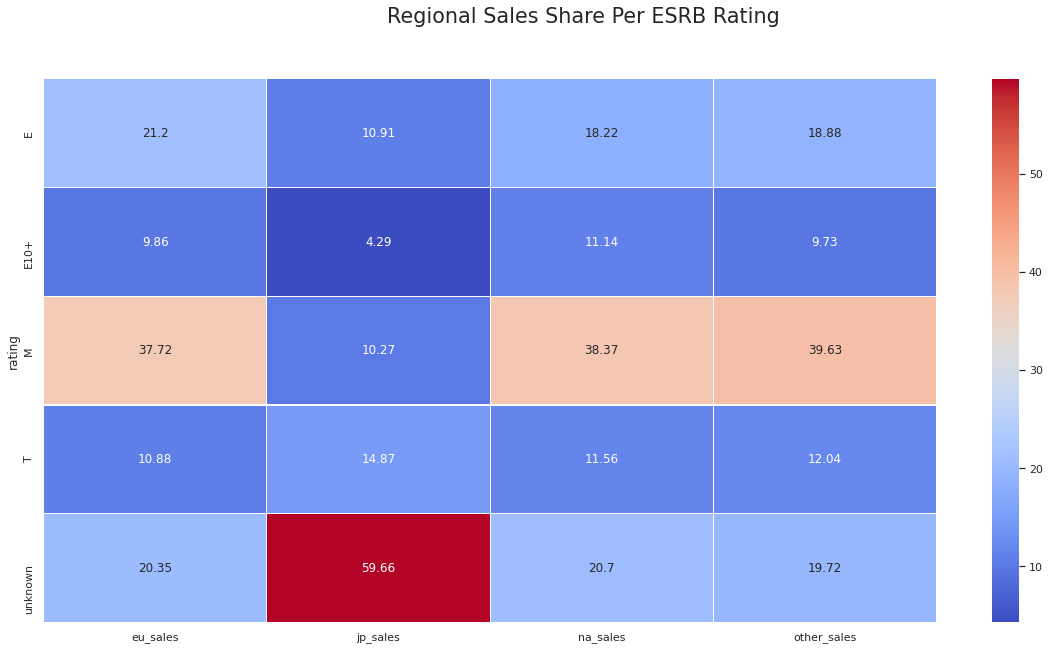

In [75]:
# дам название графику для наглядности
plt.suptitle('Regional Sales Share Per ESRB Rating', size='xx-large')
# воспользуюсь sns.heatmap с аннотациями
sns.heatmap(
    data=esrb_sales,
    cmap='coolwarm',
    linewidths=0.1,
    annot=True,
    fmt='g'
)

#### 3.6. Вывод:

В Европе, Северной Америке и Других регионах наиболее распространены игры с рейтингом "M" - mature, с рекомендуемым возрастом игрока 17+. Доля таких игр в данных составляет от 37.72% до 39.63%.  
На втором месте находятся игры с возрастным рейтингом "E" - everyone, рекомендуемые для любых возрастов. Доля от 18.22% до 21.20%.  
На третьем месте находятся как игры с рейтингом "E10+" - everyone 10+, так и "T" - teen 13+. Доля каждого из них укладывается в диапазон от 9.86% до 12.04%.
Доля игр с неизвестным рейтингом по Европе, Северной Америке и Других регионах составляет от 19.72% до 20.35%. Так как это игры с возрастными рейтингами по которым у нас нет полных данных, не могу присвоить им место, так как доля неизвестного рейтинга это не признак по которому можно ориентароваться при прогнозировании продаж, это лишь процент упущенных значений.

Япония вновь значительно отличается от остальных представленных регионов.  
В Японии лидирует рейтинг "T" - 14.87% от общего количества.  
На втором месте с незначительным отставанием следуют рейтинги "T" и "M" - 10.91% и 10.27% соответственно.  
Лидирующий в остальных регионах рейтинг "E10+" занимает третье место - 4.29%.  
Доля игр с неизвестным возрастным рейтингом в Японии достигает более половины от всех продаж - 59.66%. Либо сбор данных по Японии организован с ошибками, либо для игр предназначенных сугубо для релизов внутри страны не испоьзуется международная система возрастных рейтингов.

## Шаг 4. Статистический анализ данных - проверка гипотез

Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковы;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

### 4.1. Проверка гипотезы - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковы":

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не отичаются.  
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC отичаются.  
Критический уровень статистической значимости приму равным 5% (0.05).

In [76]:
# подготовлю средние оценки пользоваетелей по платформам за каждый год
platform_avg_uscore = data_past_2013.groupby(['year_of_release', 'platform']).mean().reset_index()[['platform', 'user_score']]
platform_avg_uscore.sample(5)

,platform,user_score
8,3DS,6.511719
28,PSV,7.777344
16,3DS,7.296875
11,PS4,6.835938
19,PS4,6.875000


In [77]:
# подготовлю массивы по требуемым платформам
pc_uscores = platform_avg_uscore.query('platform == "PC"')['user_score']
xone_uscores = platform_avg_uscore.query('platform == "XOne"')['user_score']

In [78]:
# задам альфу равной 5%
alpha = .05

# нет основания считать что дисперсии генеральной совокупности различаются - equal_var=True
results = st.ttest_ind(
    pc_uscores,
    xone_uscores,
    equal_var=True
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.3831123511290004
Не получилось отвергнуть нулевую гипотезу


#### 4.1. Вывод:

Нулевая гипотеза не может быть отвергута, средние пользовательские рейтинги платформ Xbox One и PC не отличаются.  

### 4.2. Проверка гипотезы - "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные":

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковы.  
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.  
Критический уровень статистической значимости приму равным 5% (0.05).

In [79]:
# подготовлю средние оценки пользоваетелей по жанрам за каждый год
ganre_avg_uscore = data_past_2013.groupby(['year_of_release', 'genre']).mean().reset_index()[['genre', 'user_score']]
ganre_avg_uscore.sample(5)

,genre,user_score
5,Puzzle,6.800781
20,Shooter,6.761719
11,Strategy,4.800781
17,Puzzle,8.601562
33,Simulation,6.753906


In [80]:
# подготовлю массивы по требуемым жанрам
action_uscores = ganre_avg_uscore.query('genre == "Action"')['user_score']
sports_uscores = ganre_avg_uscore.query('genre == "Sports"')['user_score']

In [81]:
# задам альфу равной 5%
alpha = .05

# нет основания считать что дисперсии генеральной совокупности различаются - equal_var=True
results = st.ttest_ind(
    action_uscores,
    sports_uscores,
    equal_var=True
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 6.628386284236036e-05
Отвергаем нулевую гипотезу


#### 4.2. Вывод:

Нулевая гипотеза отвергнута, средние пользовательские рейтинги жанров Action и Sports разные. 

## Шаг 5. Общий вывод

Целью проекта было получение данных для проведения рекламной кампании в 2017 году.  
Для успешного проведения рекламной кампании рекомендую обратить внимание на следующие выявленные особенности:
Платформы:
- Перспективными платформами 2017 года являются платформы "PS4" и "XOne";
- Потенциально перспективной платформой является выходящая в 2017 году платформа Nintendo Switch, так как ее разработчик стабильно выпускал игры вошедшие в список классических, а предыдущая портативная консоль "3DS" этого разработчика вошла в топ-5 по всем регионам;
- Платформа "PC" не продает много игр, но не теряет актуальности. Она входит в Топ-5 по европейскому региону;
- Рекламные кампании ориентированные на различные регионы должны принимать во внимание платформенные предпочтения данных регионов. Так, нет смысла рекламировать консоли серии XBox в Японии;
- В Японии наиболее популярны портативные консоли, в остальных регионах наиболее популярны стационарные консоли.

Жанры:
- Есть существенные различия между самыми издаваемыми и самыми продаваемыми жанрами;
- Жанровые предпочтения пользователей из Европы, Северной Америки и Других регионов во многом схожи, но Япония существенно от них отличается.

Рейтинги:
- Вероятнее всего рейтинги пользователей и критиков не влияют на продажи игр. Отдельные игры продаются значитеьно большим количеством копий независимо от низкой оценки пользователей, м получают низкую оценку пользователей независимо от высокой оценки критиков. Скорее всего на продажи влияет бюджет разработки и маркетинга самой игры - следует следить за игровой прессой и продавать ожидаемые новинки;
- Сложно судить о влиянии возрастного рейтинга на продажи так как множество иных факторов влияет на продажи каждой конкретной игры, а распространение возрастного рейтинга может бытьт вызвано не продажами, а вкусами пользователей каждого конкретного регионального рынка, старающегося подстроиться под клиента. То есть речьь, скорее всего, идет о зависимости возрастного рейтинга будущих проектов от текущих продаж. Тем не менее, как с Платформами и Жанрами, существенные различия возрастных рейтингов прослеживаются только между Японией и иными регионами.